In [ ]:
pip install scikit-fuzzy


In [ ]:
pip install paho-mqtt

C:\Matheus\Inatel\Python\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


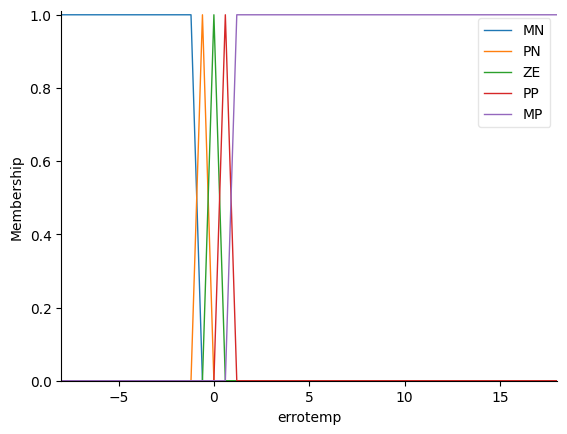

In [1]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client("testeMB")
client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-8, 18.1, 0.1), 'errotemp') # pode-se colocar em decimal para melhorar a precisão
varerrotemp =ctrl.Antecedent(np.arange(-1, 1.01, 0.01), 'varerrotemp')
resfriador =ctrl.Consequent(np.arange(0, 101, 1), 'resfriador')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe,[-8, -8, -1.2,-0.6])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-1.2,-0.6,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-0.6, 0, 0.6])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 0.6, 1.2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[0.6, 1.2, 18,18])
# You can see how these look with .view()
errotemp.view()

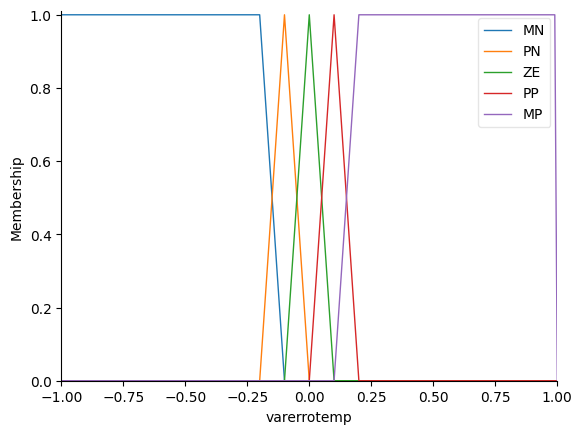

In [2]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe,[-1,-1,-0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 1, 1])
# You can see how these look with .view()
varerrotemp.view()

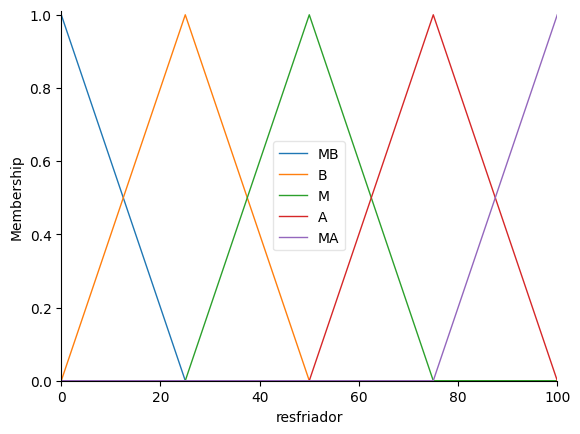

In [3]:
resfriador['MB'] = fuzz.trimf(resfriador.universe, [0, 0, 25])
resfriador['B'] = fuzz.trimf(resfriador.universe, [0, 25, 50])
resfriador['M'] = fuzz.trimf(resfriador.universe, [25, 50, 75])
resfriador['A'] = fuzz.trimf(resfriador.universe, [50, 75, 100])
resfriador['MA'] = fuzz.trimf(resfriador.universe, [75, 100, 100])
resfriador.view()

In [4]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], resfriador['MB'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], resfriador['MB'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], resfriador['B'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], resfriador['M'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], resfriador['M'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], resfriador['MB'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], resfriador['B'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], resfriador['B'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], resfriador['A'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], resfriador['A'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], resfriador['MB'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], resfriador['B'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], resfriador['M'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], resfriador['A'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], resfriador['MA'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], resfriador['B'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], resfriador['B'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], resfriador['M'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], resfriador['A'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], resfriador['MA'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], resfriador['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], resfriador['M'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], resfriador['A'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], resfriador['MA'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], resfriador['MA'])

In [5]:
resfriador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(resfriador_ctrl)

In [ ]:
sp=-2
tempatual=-5
print(tempatual)
erroatual=3
while True: 
    erroanterior=erroatual
    erroatual=tempatual-sp
    varerroTemp=erroatual-erroanterior
    potencia.input['errotemp'] = erroatual
    potencia.input['varerrotemp'] = varerroTemp
    print('Erro atual: ', erroatual)
    print('Variação do erro: ', varerroTemp)
    potencia.compute()
    print('Potencia: ', potencia.output['resfriador'])
    i=0
    while (i < 10):
        tempatual = 0.9952*tempatual - 0.0003963*potencia.output['resfriador']
        # print('Acumulo da temp: ', tempatual)
        time.sleep(0.1)
        i += 1
    print()
    print('TEMPERATURA ATUAL: ', tempatual)
    client.publish("ResfriadorM/Temperatura", tempatual)
    client.publish("ResfriadorM/erro", erroatual)